<a href="https://colab.research.google.com/github/convolutionalNN/Projects-For-Fun/blob/master/Neuroscience/Artificially_Defined_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#######################################################################################
#    ORIGINAL SOURCE CODE:
#    Title: <Simple Neural Network with 1 hidden layer with the number
#    of hidden units as a hyperparameter to calculate the XOR function>
#    Author: <Kitsios Konstantinos>
#    Date: <Nov 10, 2018>
#    Code version: <1.0.1>
#    Availability: <https://github.com/kitsiosk/xor-neural-net/blob/master/neural_net.py>
#
#######################################################################################

In [0]:
#HYPERPARAMETERS
num_of_iters = 1000 #signals sent
learning_rate = 0.3
binary1 = 0
binary2 = 1
sequence1 = 4
sequence2 = 6

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
X_train = []
for i in range(0,191):
  X_train.append([i])
X_train = np.array(X_train, dtype=np.uint8)
X_train = np.unpackbits(X_train, axis=1)
X_train = np.rot90(X_train ,3)

In [0]:
X_test = []
for i in range(192,255):
  X_test.append([i])
X_test = np.array(X_test, dtype=np.uint8)
X_test = np.unpackbits(X_test, axis=1)
X_test = np.rot90(X_test, 3)

In [0]:
Y_train = []
for i in range(0,191):
  if(X_train[sequence1][i] == binary1 and X_train[sequence2][i] == binary2):
    Y_train.append(1)
  else:
    Y_train.append(0)

In [0]:
Y_test = []
for i in range(0, 63):
  if(X_test[sequence1][i] == binary1 and X_test[sequence2][i] == binary2):
    Y_test.append(1)
  else:
    Y_test.append(0)

Cost after iteration# 0: 0.937583
Cost after iteration# 100: 0.016826
Cost after iteration# 200: 0.005427
Cost after iteration# 300: 0.003092
Cost after iteration# 400: 0.002183
Cost after iteration# 500: 0.001690
Cost after iteration# 600: 0.001377
Cost after iteration# 700: 0.001161
Cost after iteration# 800: 0.001002
Cost after iteration# 900: 0.000880
Cost after iteration# 1000: 0.000783


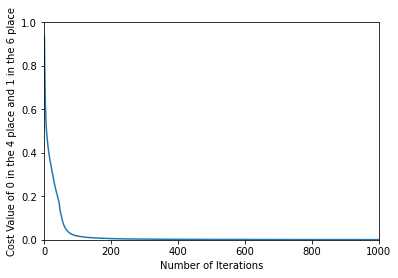

In [0]:
X = X_train
Y = np.array(Y_train)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(8, 8) #n_h,n_x
    b1 = np.zeros((8, 1))
    W2 = np.random.randn(8, 8) #n_h, n_x
    b2 = np.zeros((8, 1)) #n_h, 1
    W3 = np.random.randn(8, 8)
    b3 = np.zeros((8, 1))
    W4 = np.random.randn(n_y, 8)
    b4 = np.zeros((n_y, 1))


    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3,
        "W4": W4,
        "b4": b4
    }
    return parameters

def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = np.tanh(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)

    cache = {
        "A1": A1,
        "A2": A2,
        "A3": A3,
        "A4": A4
    }
    return A4, cache


def calculate_cost(A4, Y):
    cost = -np.sum(np.multiply(Y, np.log(A4)) +  np.multiply(1-Y, np.log(1-A4)))/m
    cost = np.squeeze(cost)

    return cost

def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    A4 = cache["A4"]

    W4 = parameters["W4"]
    W3 = parameters["W3"]
    W2 = parameters["W2"]

    dZ4 = A4 - Y
    dW4 = np.dot(dZ4, A3.T)/m
    db4 = np.sum(dZ4, axis=1, keepdims=True)/m
    dZ3 = np.multiply(np.dot(W4.T, dZ4), 1-np.power(A3, 2))
    dW3 = np.dot(dZ3, A2.T)/m
    db3 = np.sum(dZ3, axis=1, keepdims=True)/m
    dZ2 = np.multiply(np.dot(W3.T, dZ3), 1-np.power(A2, 2))
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
        "dW3": dW3,
        "db3": db3,
        "dW4": dW4,
        "db4": db4
    }

    return grads

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    dW4 = grads["dW4"]
    db4 = grads["db4"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    W4 = W4 - learning_rate*dW4
    b4 = b4 - learning_rate*db4
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2,
        "W3": W3,
        "W4": W4,
        "b3" : b3,
        "b4" : b4
    }

    return new_parameters


def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)

    costs = [] #ADDED

    for i in range(0, num_of_iters+1):
        a4, cache = forward_prop(X, parameters)

        cost = calculate_cost(a4, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        costs.append(cost) #ADDED

        if(i%100 == 0):
            costs.append(cost)
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    plt.plot(costs) #ADDED
    plt.ylabel('Cost Value of ' + x)
    plt.xlabel('Number of Iterations')
    plt.axis([0, 1000, 0, 1])


    return parameters

def predict(X, parameters):
    a4, cache = forward_prop(X, parameters)
    yhat = a4
    yhat = np.squeeze(yhat)
    y_predict = yhat #NEW
    return y_predict


np.random.seed(2)

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 8     #No. of neurons in first layer
n_h = 8     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer

trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

x = str(binary1) + ' in the ' + str(sequence1) + ' place and ' + str(binary2) + ' in the ' + str(sequence2) + ' place'

In [0]:
X = X_test
Y = np.array(Y_test)
accuracy = []
results = predict(X_test, trained_parameters)
print(results)
for i in range(len(results)):  
  if(results[i] > 0.5):
    accuracy.append(1)
  else:
    accuracy.append(0)
error = np.sum(np.array(accuracy) - Y_test)
print('Accuracy: ' + str(100 - error) + '%')